In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime

#Dades de connexió

usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la connexió
url_conexion=f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("conexió correcta")
    #cnx.close()
except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Recordar que inspect del codi anterior quan creo la connexió amb sqlalchemy
#from sqlalchemy import create_engine, inspect
inspector=inspect(engine)
nombre_tablas=inspector.get_table_names()

# Diccionario para almacenar los DataFrames
df= {}

for taula in nombre_tablas:
    query=f"select * from {taula}"
    
    try:
        df[taula] = pd.read_sql(query, cnx)
        print(f"Taula '{taula}' carregada correctament.")
    except Exception as e:
        print(f"Error al carregar la taula '{taula}':{e}")
  
# Tancar la connexió
cnx.close()

conexió correcta
Taula 'BANK_marketing' carregada correctament.


In [2]:
df_BANK_marketing=df['BANK_marketing']

In [3]:
df_BANK_marketing.head()

,id,age,job,marital,education,faltante,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,1,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,-1,0,unknown,1
1,3,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,-1,0,unknown,1
2,4,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,-1,0,unknown,1
3,5,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,-1,0,unknown,1
4,6,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,-1,0,unknown,1


In [4]:
df_BANK_vista_marketing=df_BANK_marketing[['id','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit']]

In [5]:
df_BANK_vista_marketing.describe()

,id,day,duration,campaign,pdays,previous,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,3222.336342,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,2792.250000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,5582.500000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,8372.750000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,11163.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


In [6]:
df_BANK_vista_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11162 non-null  int64 
 1   contact   11162 non-null  object
 2   day       11162 non-null  int64 
 3   month     11162 non-null  object
 4   duration  11162 non-null  int64 
 5   campaign  11162 non-null  int64 
 6   pdays     11162 non-null  int64 
 7   previous  11162 non-null  int64 
 8   poutcome  11162 non-null  object
 9   deposit   11162 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 872.2+ KB


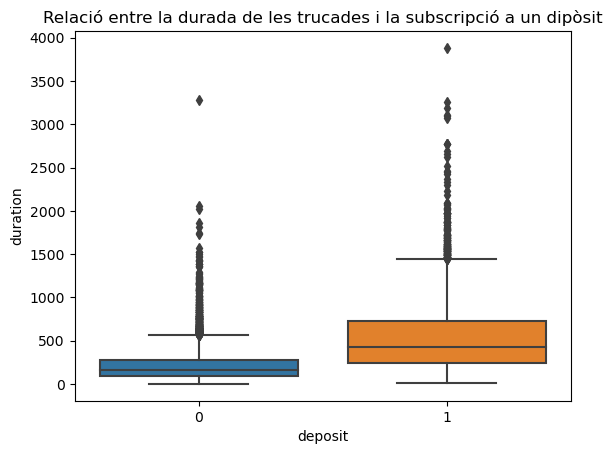

In [7]:
# Crear un boxplot per veure la distribució de la durada segons si s'ha subscrit al dipòsit
sns.boxplot(x='deposit', y='duration', data=df_BANK_vista_marketing)
plt.title('Relació entre la durada de les trucades i la subscripció a un dipòsit')
plt.show()


Análisis de la relación entre la duración de las llamadas y la probabilidad de suscripción a un depósito a plazo

El gráfico que se muestra es un boxplot que compara la duración de las llamadas realizadas a los clientes con respecto a si terminaron o no suscribiéndose a un depósito a plazo.
Observaciones clave:

    Clientes que no se suscribieron (deposit = 0):
        La duración media de las llamadas está concentrada entre los 0 y 500 segundos.
        La mayoría de las llamadas que no resultaron en una suscripción fueron significativamente más cortas.
        Hay algunos valores atípicos (puntos fuera del diagrama), lo que indica que hubo algunas llamadas largas, pero estas no fueron efectivas.

    Clientes que se suscribieron (deposit = 1):
        Las llamadas que resultaron en una suscripción tienden a ser más largas, con una media más elevada en comparación con los que no se suscribieron.
        El rango intercuartílico (50% de las observaciones centrales) muestra que las llamadas exitosas duran entre 250 y 750 segundos, con un máximo alrededor de 1500 segundos.
        Existe una correlación positiva entre la duración de la llamada y la probabilidad de que el cliente se suscriba.

Implicaciones para el negocio:

    Ajustes en la estrategia de llamadas: Dado que las llamadas más largas tienden a generar más suscripciones, sería beneficioso aumentar la duración de las llamadas o centrarse en mejorar la calidad de las interacciones telefónicas. Esto podría incluir la capacitación de los operadores para mantener al cliente comprometido durante más tiempo o hacer que la oferta sea más atractiva durante la llamada.

    Optimización de los recursos: También se puede considerar identificar a los clientes con mayor potencial de suscripción y asignar más tiempo y recursos a estas llamadas, dado que las llamadas largas parecen ser un factor importante para el éxito.

    Próximos pasos: Para aumentar la tasa de conversión, podríamos explorar estrategias complementarias como la segmentación de clientes y el uso de otros canales de comunicación.

En resumen, el análisis sugiere que inversiones en mejorar la duración y calidad de las interacciones telefónicas pueden aumentar significativamente las tasas de suscripción, lo que representa una oportunidad clave para mejorar el rendimiento de la campaña de marketing.

# Etiquetamos la duración de las llamadas

In [8]:
# Definir límites personalizados para las categorías
bins = [0, 138, 255, 496, 1033, df_BANK_vista_marketing['duration'].max()]  # En segundos

# Etiquetas para las categorías (una menos que los bins)
labels = ['Muy corta', 'Corta', 'Media', 'Larga', 'Muy larga']

# Crear la columna con categorías personalizadas
df_BANK_vista_marketing['duration_category'] = pd.cut(df_BANK_vista_marketing['duration'], bins=bins, labels=labels, include_lowest=True)

# Comprobar las primeras filas para verificar las categorías
print(df_BANK_vista_marketing[['duration', 'duration_category']].head())



   duration duration_category
0      1042         Muy larga
1      1467         Muy larga
2      1389         Muy larga
3       579             Larga
4       673             Larga


C:\Users\Gman\AppData\Local\Temp\ipykernel_2328\2031402174.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing['duration_category'] = pd.cut(df_BANK_vista_marketing['duration'], bins=bins, labels=labels, include_lowest=True)


C:\Users\Gman\AppData\Local\Temp\ipykernel_2328\991153239.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BANK_vista_marketing['duration_category'] = pd.cut(df_BANK_vista_marketing['duration'], bins=bins, labels=labels, include_lowest=True)


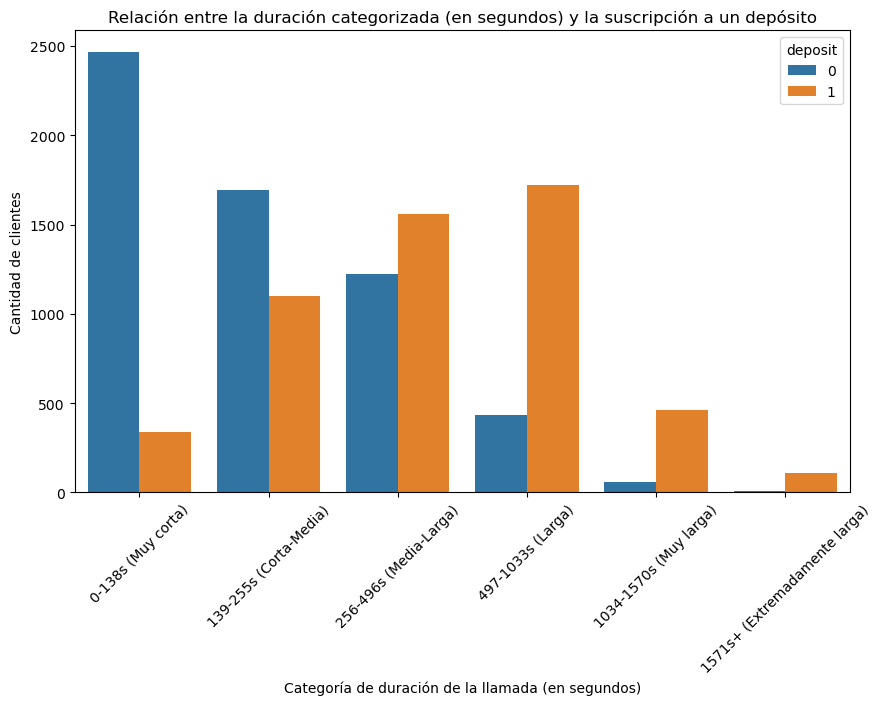

In [14]:
# Definir los límites personalizados para las categorías (en segundos), incluyendo un nuevo bin para 1571+ segundos
bins = [0, 138, 255, 496, 1033, 1570, df_BANK_vista_marketing['duration'].max()]

# Etiquetas con los rangos de segundos, incluyendo el nuevo bin
labels = ['0-138s (Muy corta)', '139-255s (Corta-Media)', '256-496s (Media-Larga)', 
          '497-1033s (Larga)', '1034-1570s (Muy larga)', '1571s+ (Extremadamente larga)']

# Crear la columna con categorías personalizadas y los rangos de segundos
df_BANK_vista_marketing['duration_category'] = pd.cut(df_BANK_vista_marketing['duration'], bins=bins, labels=labels, include_lowest=True)

# Crear un gráfico de barras para ver la distribución de duración por categoría y suscripción
plt.figure(figsize=(10,6))
sns.countplot(x='duration_category', hue='deposit', data=df_BANK_vista_marketing)
plt.title('Relación entre la duración categorizada (en segundos) y la suscripción a un depósito')
plt.xlabel('Categoría de duración de la llamada (en segundos)')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mayor legibilidad
plt.show()




# ¿Cómo afecta la duración de las llamadas de contacto a la probabilidad de que un cliente suscriba un depósito a plazo, y qué ajustes podríamos hacer en nuestros métodos de contacto para mejorar la tasa de respuesta?

# Cómo afecta la duración de las llamadas a la suscripción:

## Llamadas muy cortas (0-138 segundos):

Las llamadas de muy corta duración muestran una proporción extremadamente baja de clientes que se suscriben a un depósito. En este tipo de interacciones, el cliente no recibe suficiente información o tiempo para evaluar adecuadamente la oferta, lo que resulta en una baja efectividad en términos de conversión.

## Posibles razones por las que las llamadas muy cortas no generan conversiones:

- Llamadas en días festivos o fines de semana:
           Los clientes suelen estar ocupados o en actividades familiares, lo que les hace estar menos receptivos a recibir llamadas comerciales.

- Llamadas en horarios inadecuados:
        Demasiado temprano: Los clientes podrían estar aún en la cama o preparándose para comenzar el día, lo que los hace menos receptivos.
        Demasiado tarde: Después de la jornada laboral, los clientes pueden estar cansados o relajándose y prefieren no ser molestados.
        Horarios de comida (almuerzo/cena): Las horas alrededor del mediodía y la cena son momentos en los que los clientes no quieren interrupciones.

- Interrupción durante el trabajo:
        Si la llamada se realiza en horas laborales y el cliente está trabajando, es probable que la llamada sea rechazada rápidamente o que el cliente quiera finalizarla lo antes posible.

- Llamadas en momentos inapropiados (eventos importantes):
        Si se contacta a los clientes durante eventos personales o sociales (cumpleaños, reuniones familiares, vacaciones, etc.), es probable que la llamada se rechace rápidamente.

- Ofertas o mensajes genéricos:
        Si el mensaje inicial de la llamada no está personalizado o parece una oferta genérica, el cliente podría no sentirse atraído y terminar la llamada rápidamente.

- Falta de confianza o desconfianza inicial:
        Si el cliente no reconoce el número o no entiende rápidamente el propósito de la llamada, podría colgar antes de que el operador pueda explicar los beneficios del producto.

- Demasiado enfoque en la venta rápida:
        Si el agente comienza la llamada con una actitud de "vender rápidamente", el cliente podría percibir esto como una presión innecesaria y finalizar la conversación de inmediato.

- Problemas técnicos o de audio:
        Un mal audio o una conexión deficiente puede causar frustración al cliente, llevándolo a colgar rápidamente si no puede entender bien la llamada.

- El cliente no está en el mercado adecuado:
        Puede que el cliente simplemente no esté interesado en productos financieros en ese momento (quizá ya tiene lo que necesita), por lo que la llamada termina muy rápido.

- Falta de preparación del agente:
        Si el agente no está bien informado o no sabe cómo manejar la conversación en los primeros segundos, es probable que el cliente pierda el interés rápidamente y termine la llamada.

## Recomendaciones para mejorar el tiempo y calidad de las llamadas:

- Segmentar a los clientes por horarios y días: Asegúrate de que los contactos se realicen en horas apropiadas y evita llamar durante días festivos o fines de semana, a menos que el cliente lo prefiera.

- Optimizar el mensaje inicial: Entrena a los agentes para que en los primeros 10 segundos logren captar la atención del cliente, personalizando la oferta y explicando brevemente el valor de la llamada.

- Verificar la disponibilidad del cliente: Antes de comenzar con el pitch, es útil preguntarle al cliente si es un buen momento para hablar y ofrecer la opción de llamar más tarde.

- Personalización de la oferta: Utiliza datos disponibles sobre el cliente para hacer la oferta lo más relevante posible desde el principio, evitando mensajes genéricos que puedan ser percibidos como spam.

- Capacitar a los agentes en manejo de objeciones: Asegúrate de que los agentes puedan manejar objeciones comunes de forma eficaz y con confianza para evitar que el cliente finalice la llamada prematuramente.

- Reducir la presión en la venta: En lugar de intentar cerrar la venta rápidamente, enfocar las llamadas en entender las necesidades del cliente y crear una relación antes de intentar cerrar el trato.

# Conclusión:

Las llamadas muy cortas generalmente fracasan porque no se han optimizado los horarios de contacto, los mensajes iniciales, o los métodos de interacción. Mejorando estos aspectos, podrías lograr que los clientes estén más dispuestos a escuchar y participar en la conversación, lo que aumentará la tasa de conversión en llamadas de mayor duración.

Este listado puede servirte para incluirlo en una presentación sobre cómo mejorar la eficiencia de las llamadas y reducir el número de interacciones fallidas.

# Llamadas de duración corta-media (139-255 segundos):

Aunque hay una mejora en la tasa de conversión en comparación con las llamadas muy cortas, la mayoría de los clientes en este rango de duración siguen sin suscribirse. Esto sugiere que estas llamadas proporcionan algo más de tiempo para presentar la oferta, pero aún no logran establecer un compromiso fuerte con el cliente, por lo que no son óptimas para generar conversiones.

# Llamadas medias-largas (256-496 segundos):

En este grupo, se observa un aumento significativo en las suscripciones. Estas llamadas parecen alcanzar un punto ideal donde el cliente recibe la información necesaria y tiene tiempo suficiente para hacer preguntas y procesar la oferta, lo que conduce a una tasa de conversión considerablemente mayor. Este rango debería considerarse como un estándar a seguir, ya que maximiza la efectividad.

# Llamadas largas (497-1033 segundos):
Las llamadas más prolongadas continúan mostrando tasas de conversión elevadas. Estas interacciones permiten que los clientes profundicen más en los detalles y comprendan mejor los beneficios, lo que refuerza la idea de que las llamadas más largas tienden a ser más exitosas para convertir a los clientes. Sin embargo, es importante asegurar que estas llamadas no se alarguen innecesariamente.

# Llamadas muy largas (1034-1570 segundos):

Aunque las conversiones siguen siendo altas, las llamadas muy largas muestran una ligera caída en efectividad. Esto podría deberse a que, en algunos casos, el cliente puede perder interés si la llamada se prolonga demasiado. Aquí es crucial mantener un balance entre proporcionar información suficiente y evitar que la conversación se torne tediosa o repetitiva.

# Llamadas extremadamente largas (1570+ segundos):

Este rango de duración es el menos efectivo en cuanto a conversión. Las llamadas extremadamente largas no solo son ineficaces, sino que también podrían estar mal gestionadas, causando que el cliente pierda interés y no se suscriba. Estas llamadas deberían ser evaluadas y optimizadas para reducir su duración o mejorar su estructura, enfocándose en lograr una mayor eficiencia.

## Causas que afectan la productividad de las llamadas largas y muy largas:

## Problemas técnicos durante la llamada:
- Audio deficiente: Las llamadas pueden extenderse innecesariamente si hay cortes o interferencias en el audio, lo que obliga a repetir la información.
- Fallo en la conexión: Si hay interrupciones en la conexión, los tiempos de respuesta se ven afectados, alargando la llamada.

## Problemas con las herramientas del agente:
- Lentitud en las plataformas: Si las herramientas de trabajo (CRM, bases de datos, etc.) son lentas o poco eficientes, los tiempos de carga pueden provocar retrasos.
- Errores al cambiar de pantallas: Si el agente experimenta retrasos al cambiar entre pantallas o sistemas, puede hacer que el cliente pierda el interés o se frustre, además de aumentar el tiempo total de la llamada.

## Problemas de comunicación del cliente:
- Dificultades del habla o lentitud al hablar: Algunos clientes pueden tener problemas del habla o hablar más lentamente, lo que prolonga el tiempo necesario para transmitir la información.
- Buscar información durante la llamada: En algunas ocasiones, el cliente necesita buscar documentación (como números de cuenta, documentos de identidad, etc.), lo que puede extender la llamada si no tiene los datos a mano.

# Demoras por parte del agente:
- Tiempos prolongados para tomar decisiones: Si el agente tarda mucho en procesar la información o en tomar decisiones sobre cómo proceder, esto puede hacer que la llamada se prolongue innecesariamente.
- Demora en realizar acciones técnicas: Algunos agentes pueden necesitar más tiempo para completar tareas técnicas (como actualizar datos en sistemas), lo que ralentiza el proceso.

## Falta de formación del agente:
- Inseguridad en el manejo del cliente: Agentes que no están bien capacitados pueden tener dificultades para manejar objeciones o preguntas complejas, lo que alarga la conversación.
- Desconocimiento de productos o procesos: Si el agente no está completamente familiarizado con los productos o procesos, podría necesitar consultar a otros colegas o buscar información durante la llamada, retrasando la conversación.

## Cliente indeciso:
- Algunos clientes simplemente necesitan más tiempo para tomar decisiones y pueden hacer preguntas repetitivas o cambiar de opinión durante la llamada, lo que prolonga la interacción.

## Demasiada información innecesaria:
- Si el agente ofrece demasiados detalles o entra en aspectos no relevantes para el cliente, puede dilatar la llamada y disminuir la eficiencia.

## Mala gestión del tiempo:
- Los agentes pueden no saber cuándo cortar la conversación de manera eficiente, lo que lleva a una extensión innecesaria de la llamada.

- Uso ineficaz de pausas o tiempos muertos:
        Los tiempos de espera durante la llamada pueden alargarse si el agente tarda en regresar o si deja al cliente en espera sin un motivo claro, lo que afecta la percepción de la eficiencia y aumenta el tiempo total de la llamada.

- Falta de preparación del cliente:
        En algunos casos, los clientes pueden estar mal preparados para la llamada (por ejemplo, no tener los datos requeridos a mano) y esto retrasa el proceso.

## Recomendaciones para mejorar la productividad de las llamadas largas y muy largas:

- Mejora de las herramientas tecnológicas:
        Asegúrate de que los sistemas y herramientas utilizados por los agentes sean rápidos, eficientes y estén bien integrados para evitar tiempos de espera innecesarios.

- Capacitación adicional para los agentes:
        Formación continua para los agentes en cuanto a manejo de objeciones, fluidez en la conversación, y rapidez en la toma de decisiones. Esto les permitirá ser más ágiles en las llamadas y optimizar el tiempo.

- Optimización de la infraestructura técnica:
        Mejorar la conectividad y la calidad del audio para evitar problemas técnicos durante las llamadas que obliguen a repetir información.

- Uso de guiones de llamada bien estructurados:
        Proporcionar guiones claros que ayuden a los agentes a enfocarse en la información clave y eviten entrar en detalles innecesarios que prolonguen la llamada.

- Gestión del tiempo de la llamada:
        Capacitar a los agentes para que sepan cuándo es adecuado cerrar la llamada de manera educada pero eficiente, evitando tiempos muertos o extensiones innecesarias.

- Preparación previa del cliente:
        Cuando sea posible, enviar recordatorios a los clientes antes de la llamada para que tengan a mano la documentación o información que podrían necesitar durante la interacción, reduciendo así tiempos de búsqueda.

- Desarrollar habilidades de escucha activa:
        Enseñar a los agentes a detectar rápidamente las necesidades del cliente y a manejar la conversación de forma eficaz, evitando que se prolongue más de lo necesario.

- Optimización del flujo de trabajo:
        Mejorar los procedimientos internos para que las acciones que debe realizar el agente (por ejemplo, actualización de datos o gestión de información) sean más rápidas y menos propensas a errores.


In [10]:
# Crear la tabla de contingencia
contact_deposit_table = pd.crosstab(df_BANK_marketing['contact'], df_BANK_marketing['deposit'], margins=True)

# Mostrar la tabla de contingencia
print(contact_deposit_table)


deposit       0     1    All
contact                     
cellular   3673  4369   8042
telephone   384   390    774
unknown    1816   530   2346
All        5873  5289  11162


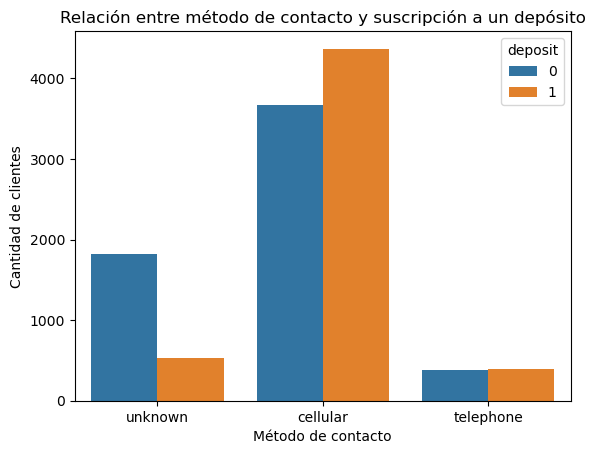

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras
sns.countplot(x='contact', hue='deposit', data=df_BANK_marketing)
plt.title('Relación entre método de contacto y suscripción a un depósito')
plt.xlabel('Método de contacto')
plt.ylabel('Cantidad de clientes')
plt.show()
